In [4]:
import sys
print(sys.version) # 3.12
import numpy as np # !pip3 install numpy
import pandas as pd # !pip3 install pandas
import matplotlib.pyplot as plt # !pip3 install matplotlib
import seaborn as sns # !ip install seaborn
sns.set_theme()
import yfinance as yf # !pip3 install yfinance

3.11.6 (main, Oct  2 2023, 13:45:54) [Clang 15.0.0 (clang-1500.0.40.1)]


In [5]:
def retrieve_hist_assets(assets: list, window_range="2y") -> list:
    """Retrieve asset history values.

    Ecrire une fonction qui prend en entrée une liste de 5 actifs et qui renvoie les prix journaliers sur
    une fenêtre de 2 à 3 ans (le choix est donné à l’utilisateur) à partir de Yahoo Finance.

    N.B.:
        - package link: https://pypi.org/project/yfinance/
    :param assets: list of assets (max 5)
    :return: asset historical list
    """
    if len(assets) > 5:
        raise ValueError("On ne peut pas avoir plus de 5 assets!")
    if not window_range in ["2y", "3y"]:
        raise ValueError("Tu peux seulement demander 2y -> historique 2 ans ou 3y -> ...")
    df = pd.DataFrame()
    for asset in assets:
        msft = yf.Ticker(asset)
        hist = msft.history(period=window_range)
        hist_df = pd.DataFrame(hist)
        hist_df["actif"] = asset
        hist_df = hist_df.reset_index()
        if df.empty:
            df = hist_df.copy()
        else:
            df = pd.concat([df, hist_df])
    df["jour"] = df.Date.dt.strftime('%Y-%m-%d')
    df["mois"] = df.Date.dt.strftime('%Y-%m')
    df["annee"] = df.Date.dt.strftime('%Y')
    df = df.drop(columns=["Dividends", "Stock Splits"])
    return df.reset_index()

df = retrieve_hist_assets(assets=["AAPL", "MSFT", "AMZN", "GOOG", "TSLA"], window_range="2y")
df.sample(30)

,index,Date,Open,High,Low,Close,Volume,actif,jour,mois,annee
890,388,2023-07-24 00:00:00-04:00,344.420250,345.485834,340.894876,343.683289,26678100,MSFT,2023-07-24,2023-07,2023
2085,77,2022-04-26 00:00:00-04:00,331.809998,333.333344,291.666656,292.140015,136133700,TSLA,2022-04-26,2022-04,2022
1711,205,2022-10-27 00:00:00-04:00,94.309998,95.169998,91.900002,92.599998,54036500,GOOG,2022-10-27,2022-10,2022
903,401,2023-08-10 00:00:00-04:00,324.672224,326.902984,319.852236,321.595001,20113700,MSFT,2023-08-10,2023-08,2023
1054,50,2022-03-17 00:00:00-04:00,152.640503,157.498505,152.139999,157.238998,72934000,AMZN,2022-03-17,2022-03,2022
2277,269,2023-01-31 00:00:00-05:00,164.570007,174.300003,162.779999,173.220001,196813500,TSLA,2023-01-31,2023-01,2023
2398,390,2023-07-26 00:00:00-04:00,263.250000,268.040009,261.750000,264.350006,95856200,TSLA,2023-07-26,2023-07,2023
1958,452,2023-10-23 00:00:00-04:00,136.229996,139.020004,135.110001,137.899994,20780700,GOOG,2023-10-23,2023-10,2023
118,118,2022-06-24 00:00:00-04:00,138.699294,140.692053,138.570420,140.444199,89116800,AAPL,2022-06-24,2022-06,2022
2116,108,2022-06-09 00:00:00-04:00,249.339996,255.546661,239.326660,239.706665,96491400,TSLA,2022-06-09,2022-06,2022


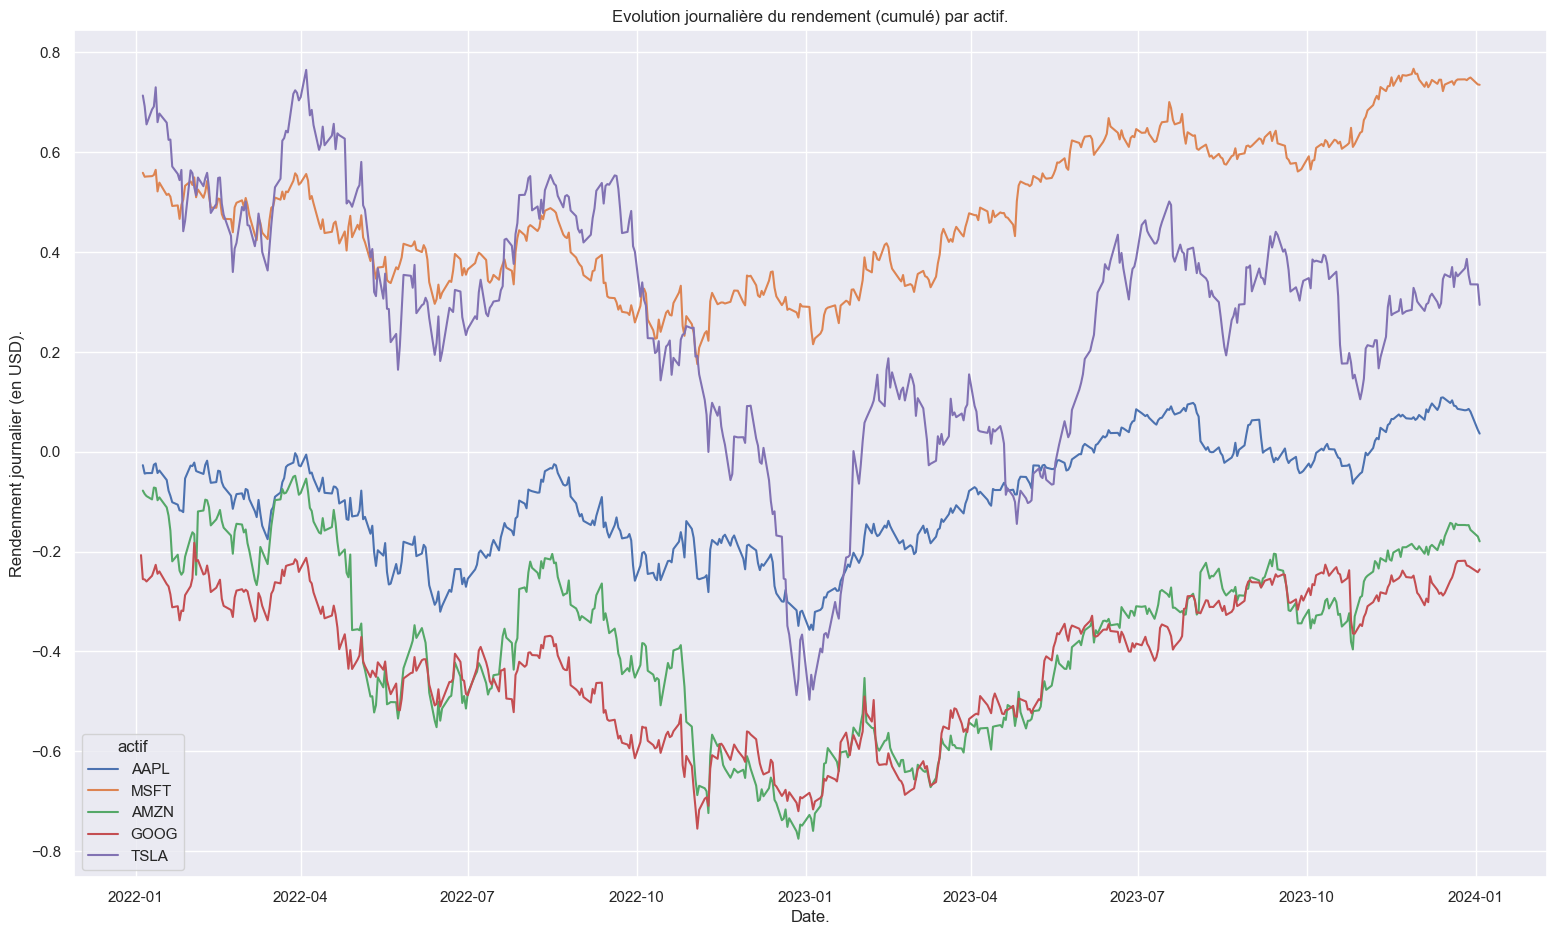

,index,Date,Open,High,Low,Close,Volume,actif,jour,mois,annee,Rendement_Qtot,Rendement_Qtot_mean_month,Rendement_Qtot_mean_year
2480,472,2023-11-20 00:00:00-05:00,234.039993,237.100006,231.020004,235.600006,116320100,TSLA,2023-11-20,2023-11,2023,0.005533,0.008498,0.002807
2481,473,2023-11-21 00:00:00-05:00,235.039993,243.619995,233.339996,241.199997,122288000,TSLA,2023-11-21,2023-11,2023,0.023491,0.008498,0.002807
2482,474,2023-11-22 00:00:00-05:00,242.039993,244.009995,231.399994,234.210007,117950600,TSLA,2023-11-22,2023-11,2023,-0.029408,0.008498,0.002807
2483,475,2023-11-24 00:00:00-05:00,233.750000,238.750000,232.330002,235.449997,65125200,TSLA,2023-11-24,2023-11,2023,0.005280,0.008498,0.002807
2484,476,2023-11-27 00:00:00-05:00,236.889999,238.330002,232.100006,236.080002,112031800,TSLA,2023-11-27,2023-11,2023,0.002672,0.008498,0.002807
2485,477,2023-11-28 00:00:00-05:00,236.679993,247.000000,234.009995,246.720001,148549900,TSLA,2023-11-28,2023-11,2023,0.044083,0.008498,0.002807
2486,478,2023-11-29 00:00:00-05:00,249.210007,252.750000,242.759995,244.139999,135401300,TSLA,2023-11-29,2023-11,2023,-0.010512,0.008498,0.002807
2487,479,2023-11-30 00:00:00-05:00,245.139999,245.220001,236.910004,240.080002,132353200,TSLA,2023-11-30,2023-11,2023,-0.016770,0.008498,0.002807
2488,480,2023-12-01 00:00:00-05:00,233.139999,240.190002,231.899994,238.830002,121173500,TSLA,2023-12-01,2023-12,2023,-0.005220,0.001720,0.002807
2489,481,2023-12-04 00:00:00-05:00,235.750000,239.369995,233.289993,235.580002,104099800,TSLA,2023-12-04,2023-12,2023,-0.013701,0.001720,0.002807


In [9]:
def get_rendement(df: pd.DataFrame) -> pd.DataFrame:
    """
    Écrire une fonction qui calcule le rendement quotidien de chaque actif. Intégrez dans cette fonction
    une variable pour calculer le rendement espéré annualisé de chaque actif. Représentez dans le
    même graphique les rendements quotidiens des 5 actifs avec des légendes claires.
    
    N.B.:
        - I used np.log -> est-ce que c'est le bon log -> validé
        - d'ailleurs shift(1) ou shift(-1) -> shift 1
        - sum cumulé sur le lineplot?
        - à refaire avec le log en maplotlib????
    """
    new_df = df.copy()
    new_df["Rendement_Qtot"] = np.log(
        new_df.Close/new_df.Close.shift(1)
    )
    rendement_moyen_mensuel_df = (
        new_df
        .groupby(["mois", "actif"])
        .agg({"Rendement_Qtot": "mean"})
        .reset_index()
        .rename(
            columns={"Rendement_Qtot": "Rendement_Qtot_mean_month"}
        )
    )
    rendement_moyen_annuel_df = (
        new_df
        .groupby(["annee", "actif"])
        .agg({"Rendement_Qtot": "mean"})
        .reset_index()
        .rename(
            columns={"Rendement_Qtot": "Rendement_Qtot_mean_year"}
        )
    )
    new_df = (
        pd.merge(
            left=new_df,
            right=rendement_moyen_mensuel_df,
            on=["actif", "mois"],
            how="left",
        )
    )
    new_df = (
        pd.merge(
            left=new_df,
            right=rendement_moyen_annuel_df,
            on=["actif", "annee"],
            how="left",
        )
    )
    plt.figure(figsize=(19, 11))
    plt.title("Evolution journalière du rendement (cumulé) par actif.")
    plt.ylabel("Rendenment journalier (en USD).")
    plt.xlabel("Date.")
    new_df["Rendement_Qtot_cumul"] = new_df["Rendement_Qtot"].cumsum()
    new_show_df = ( # Juste pour faire ça joli, je filtre les outliers
        new_df[(new_df["Rendement_Qtot"] < 0.25) & (new_df["Rendement_Qtot"] > - 0.25)]
    )
    sns.lineplot(x=new_show_df["Date"], y=new_show_df["Rendement_Qtot_cumul"], hue=new_show_df["actif"])
    plt.show()
    return new_df.drop(columns=["Rendement_Qtot_cumul"])

df_2 = get_rendement(df=df)
df_2.tail(30)

In [11]:
def get_volatility_and_export_to_csv(df: pd.DataFrame, filename="loulou.csv") -> pd.DataFrame:
    """Compute volatility and export to .csv

    Écrire une fonction pour calculer la volatilité quotidienne et mensuelle de chaque actif, stockant les
    résultats dans un fichier .csv. Définissez une autre variable pour calculer la volatilité annualisée de
    chaque actif.

    N.B.:
        - https://medium.com/@polanitzer/volatility-calculation-in-python-estimate-the-annualized-volatility-of-historical-stock-prices-db937366a54d
        - https://blog.quantinsti.com/volatility-and-measures-of-risk-adjusted-return-based-on-volatility/
        - https://pyquantnews.com/how-to-compute-volatility-6-ways/
    """
    tmp_df = df.copy()
    tmp_df["Rendement_Qtot_squared"] = tmp_df["Rendement_Qtot"] ** 2
    tmp_df["Rendement_Qtot_mean_month_squared"] = tmp_df["Rendement_Qtot_mean_month"] ** 2
    tmp_df["Rendement_Qtot_mean_year_squared"] = tmp_df["Rendement_Qtot_mean_year"] ** 2
    print("Calcul volatilité quotidienne.")
    df_vol_daily = (
        tmp_df
        .groupby(["actif", "jour"])
        .agg({"Rendement_Qtot_squared": "sum", "index": "count"})
        .reset_index()
    )
    df_vol_daily["Daily_volatility"] = np.sqrt(df_vol_daily["Rendement_Qtot_squared"] / df_vol_daily["index"])
    print("Calcul volatilité mensuel.")
    df_vol_month = (
        tmp_df
        .groupby(["actif", "mois"])
        .agg({"Rendement_Qtot_mean_month_squared": "sum", "index": "count"})
        .reset_index()
    )
    df_vol_month["Monthly_volatility"] = np.sqrt(df_vol_month["Rendement_Qtot_mean_month_squared"] / df_vol_month["index"])
    print("Calcul volatilité annuel.")
    df_vol_year = (
        tmp_df
        .groupby(["actif", "annee"])
        .agg({"Rendement_Qtot_mean_year_squared": "sum", "index": "count"})
        .reset_index()
    )
    df_vol_year["Annual_volatility"] = np.sqrt(df_vol_year["Rendement_Qtot_mean_year_squared"] / df_vol_year["index"])
    tmp_df = (
        pd.merge(
            left=tmp_df,
            right=df_vol_daily.drop(columns=["Rendement_Qtot_squared"]),
            left_on=["actif", "jour"],
            right_on=["actif", "jour"],
            how="left",
        )
        .drop(columns=["index_y"])
        .rename(columns={"index_x": "index"})
    )
    tmp_df = (
        pd.merge(
            left=tmp_df,
            right=df_vol_month.drop(columns=["Rendement_Qtot_mean_month_squared"]),
            left_on=["actif", "mois"],
            right_on=["actif", "mois"],
            how="left",
        )
        .drop(columns=["index_y"])
        .rename(columns={"index_x": "index"})
    )
    tmp_df = (
        pd.merge(
            left=tmp_df,
            right=df_vol_year.drop(columns=["Rendement_Qtot_mean_year_squared"]),
            left_on=["actif", "annee"],
            right_on=["actif", "annee"],
            how="left",
        )
        .drop(columns=["index_y"])
        .rename(columns={"index_x": "index"})
    )
    tmp_df = tmp_df.drop(columns=["Rendement_Qtot_squared", "Rendement_Qtot_mean_month_squared", "Rendement_Qtot_mean_year_squared"])
    print(f"Creation du fichier: {filename}")
    tmp_df.drop(columns=["index"]).to_csv(filename, index=False, sep=";")
    return tmp_df

df_3 = get_volatility_and_export_to_csv(df=df_2)
df_3.sample(20)

Calcul volatilité quotidienne.
Calcul volatilité mensuel.
Calcul volatilité annuel.
Creation du fichier: loulou.csv


,index,Date,Open,High,Low,Close,Volume,actif,jour,mois,annee,Rendement_Qtot,Rendement_Qtot_mean_month,Rendement_Qtot_mean_year,Rendement_Qtot_squared,Rendement_Qtot_mean_month_squared,Rendement_Qtot_mean_year_squared,Daily_volatility,Monthly_volatility,Annual_volatility
675,173,2022-09-13 00:00:00-04:00,255.844039,257.385980,248.677955,249.073334,33353300,MSFT,2022-09-13,2022-09,2022,-0.056548,-0.005510,0.001019,3.197627e-03,0.000030,1.038502e-06,0.056548,0.005510,0.001019
1431,427,2023-09-18 00:00:00-04:00,140.479996,141.750000,139.220001,139.979996,42823500,AMZN,2023-09-18,2023-09,2023,-0.002925,-0.004110,0.002371,8.554074e-06,0.000017,5.620103e-06,0.002925,0.004110,0.002371
2003,497,2023-12-27 00:00:00-05:00,142.830002,143.320007,141.050995,141.440002,17288400,GOOG,2023-12-27,2023-12,2023,-0.009710,0.002551,0.001851,9.427500e-05,0.000007,3.424945e-06,0.009710,0.002551,0.001851
726,224,2022-11-23 00:00:00-05:00,242.955745,246.097882,242.123131,245.404037,19508500,MSFT,2022-11-23,2022-11,2022,0.010353,0.004635,0.001019,1.071895e-04,0.000021,1.038502e-06,0.010353,0.004635,0.001019
742,240,2022-12-16 00:00:00-05:00,246.365488,247.644144,241.369777,242.539413,86102000,MSFT,2022-12-16,2022-12,2022,-0.017501,-0.002949,0.001019,3.062851e-04,0.000009,1.038502e-06,0.017501,0.002949,0.001019
71,71,2022-04-18 00:00:00-04:00,162.274757,164.927866,161.928279,163.413223,69023900,AAPL,2022-04-18,2022-04,2022,-0.001332,-0.005109,-0.001279,1.773357e-06,0.000026,1.636201e-06,0.001332,0.005109,0.001279
79,79,2022-04-28 00:00:00-04:00,157.651621,162.868731,157.334826,161.997559,130216800,AAPL,2022-04-28,2022-04,2022,0.044166,-0.005109,-0.001279,1.950600e-03,0.000026,1.636201e-06,0.044166,0.005109,0.001279
2405,397,2023-08-04 00:00:00-04:00,260.970001,264.769989,253.110001,253.860001,99242600,TSLA,2023-08-04,2023-08,2023,-0.021280,-0.001547,0.002807,4.528347e-04,0.000002,7.878477e-06,0.021280,0.001547,0.002807
929,427,2023-09-18 00:00:00-04:00,327.136006,329.730745,325.698920,328.393463,16834200,MSFT,2023-09-18,2023-09,2023,-0.003519,-0.001867,0.001835,1.238339e-05,0.000003,3.365533e-06,0.003519,0.001867,0.001835
1167,163,2022-08-29 00:00:00-04:00,129.899994,131.949997,128.770004,129.789993,48101600,AMZN,2022-08-29,2022-08,2022,-0.007369,-0.002719,-0.005937,5.430798e-05,0.000007,3.525065e-05,0.007369,0.002719,0.005937
